C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\ipykernel_launcher.py:26: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326



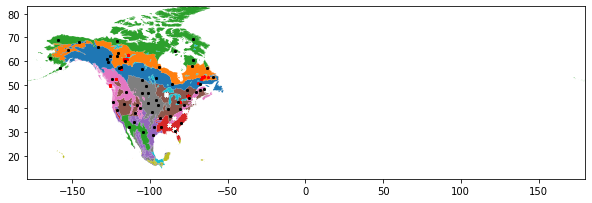

In [65]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable
NA_Forest = gpd.read_file('d:\\vegetation\\gee\\NA_Forests\\NA_Forests_1to10mill.shp')
boundary = gpd.read_file('d:\\vegetation\\gee\\USA_Canada_extent.shp')
NA_Forest=NA_Forest.to_crs(epsg=4326)
boundary=boudary.to_crs(epsg=4326)
#NA_Forest_clipped=gpd.clip(NA_Forest,boundary)
canada_LAI= pd.read_csv('d:\\vegetation\\gee\\In-situLAI_Canada_2017_2019_location.csv')
usa_LAI= pd.read_csv('d:\\vegetation\\gee\\GBOV_RM07_all_coordinate.csv')
belmanip= pd.read_csv('d:\\vegetation\\gee\\OLIVE_DATASETS.csv')
#canada_LAI.head()
# creating a geometry column 
geometry1 = [Point(xy) for xy in zip(canada_LAI['LONG'], canada_LAI['LAT'])]
geometry2 = [Point(xy) for xy in zip(usa_LAI['Lon_IS'], usa_LAI['Lat_IS'])]
geometry3 = [Point(xy) for xy in zip(belmanip['Lon_cent'], belmanip['Lat_cent'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf1 = gpd.GeoDataFrame(canada_LAI, crs=crs, geometry=geometry1)
gdf2 = gpd.GeoDataFrame(usa_LAI, crs=crs, geometry=geometry2)
gdf3 = gpd.GeoDataFrame(belmanip, crs=crs, geometry=geometry3)
gdf3_clipped = gpd.clip(gdf3, boundary)
#gdf1 = gdf1.to_crs(gdf)
#print(gdf)
#gdf.head()
#gdf.plot(column='EZMAP_CODE')
#fig, ax = plt.subplots(1, 1)
fig, ax = plt.subplots(figsize = (10,20))
xlim = ([NA_Forest.total_bounds[0],  NA_Forest.total_bounds[2]])
ylim = ([NA_Forest.total_bounds[1],  NA_Forest.total_bounds[3]])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#NA_Forest.plot(column='EZMAP_ZONE',ax=ax,legend=True,cax=cax)
#NA_Forest.plot(column='EZMAP_ZONE')
base=NA_Forest.plot(column='EZMAP_ZONE', ax=ax)
gdf1.plot(ax=base, marker='*', color='red', markersize=5);
gdf2.plot(ax=base, marker='x', color='white', markersize=5);
gdf3_clipped.plot(ax=base, marker='x', color='black', markersize=5);